
# Financial Trend Analysis of Microsoft, Tesla, and Apple (2022–2024)

**Goal:** A rigorous, portfolio-ready analysis of financial performance using 10‑K data (USD, millions).  
**Scope:** Growth, profitability, liquidity, and leverage across 3 fiscal years.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Markdown, display
file = Path("10-K_Financials__USD_millions_.csv")
df = pd.read_csv(file)
df = df.sort_values(["Company","Fiscal Year"]).reset_index(drop=True)
df.head()


,Company,Fiscal Year,Fiscal Year End,Total Revenue (USDm),Net Income (USDm),Total Assets (USDm),Total Liabilities (USDm),Cash Flow from Operating Activities (USDm)
0,Apple,2022,2022-09-24,394328,99803,352755,302083,122151
1,Apple,2023,2023-09-30,383285,96995,352583,290437,110543
2,Apple,2024,2024-09-28,391035,93736,364980,308030,118254
3,Microsoft,2022,2022-06-30,198270,72738,364840,198298,89035
4,Microsoft,2023,2023-06-30,211915,72361,411976,205753,87582



## Methodology
1. **Ingest** consolidated figures from audited 10‑K financial statements.  
2. **Engineer** YoY growth, margins, leverage, and cash conversion.  
3. **Evaluate** 2‑year CAGR (2022→2024).  
4. **Visualize** trends for comparability.  
5. **Summarize** insights with objective commentary.


In [19]:
# Feature engineering
for col in ["Total Revenue (USDm)","Net Income (USDm)","Total Assets (USDm)","Total Liabilities (USDm)","Cash Flow from Operating Activities (USDm)"]:
    df[col.replace("(USDm)","Growth (%)")] = df.groupby("Company")[col].pct_change()*100

df["Net Margin (%)"] = (df["Net Income (USDm)"]/df["Total Revenue (USDm)"])*100
df["Operating CF / Revenue (%)"] = (df["Cash Flow from Operating Activities (USDm)"]/df["Total Revenue (USDm)"])*100
df["Liabilities / Assets (%)"] = (df["Total Liabilities (USDm)"]/df["Total Assets (USDm)"])*100
df["Cash Conversion (OpCF / Net Income)"] = df["Cash Flow from Operating Activities (USDm)"]/df["Net Income (USDm)"]
df.round(2).head(9)

,Company,Fiscal Year,Fiscal Year End,Total Revenue (USDm),Net Income (USDm),Total Assets (USDm),Total Liabilities (USDm),Cash Flow from Operating Activities (USDm),Total Revenue Growth (%),Net Income Growth (%),Total Assets Growth (%),Total Liabilities Growth (%),Cash Flow from Operating Activities Growth (%),Net Margin (%),Operating CF / Revenue (%),Liabilities / Assets (%),Cash Conversion (OpCF / Net Income)
0,Apple,2022,2022-09-24,394328,99803,352755,302083,122151,NaN,NaN,NaN,NaN,NaN,25.31,30.98,85.64,1.22
1,Apple,2023,2023-09-30,383285,96995,352583,290437,110543,-2.80,-2.81,-0.05,-3.86,-9.50,25.31,28.84,82.37,1.14
2,Apple,2024,2024-09-28,391035,93736,364980,308030,118254,2.02,-3.36,3.52,6.06,6.98,23.97,30.24,84.40,1.26
3,Microsoft,2022,2022-06-30,198270,72738,364840,198298,89035,NaN,NaN,NaN,NaN,NaN,36.69,44.91,54.35,1.22
4,Microsoft,2023,2023-06-30,211915,72361,411976,205753,87582,6.88,-0.52,12.92,3.76,-1.63,34.15,41.33,49.94,1.21
5,Microsoft,2024,2024-06-30,245122,88136,512163,243686,118548,15.67,21.80,24.32,18.44,35.36,35.96,48.36,47.58,1.35
6,Tesla,2022,2022-12-31,81462,12587,82338,36440,14724,NaN,NaN,NaN,NaN,NaN,15.45,18.07,44.26,1.17
7,Tesla,2023,2023-12-31,96773,14974,106618,43009,13256,18.80,18.96,29.49,18.03,-9.97,15.47,13.70,40.34,0.89
8,Tesla,2024,2024-12-31,97690,7153,122070,48390,14923,0.95,-52.23,14.49,12.51,12.58,7.32,15.28,39.64,2.09


In [20]:
# CAGR calculations
def cagr(start, end, n):
    return (end/start)**(1/n)-1

rows = []
for company, sub in df.groupby("Company"):
    sub = sub.sort_values("Fiscal Year")
    first, last = sub.iloc[0], sub.iloc[-1]
    rows.append({"Company": company,
        "Revenue CAGR 2022-2024 (%)": cagr(first["Total Revenue (USDm)"], last["Total Revenue (USDm)"], 2)*100,
        "Net Income CAGR 2022-2024 (%)": cagr(first["Net Income (USDm)"], last["Net Income (USDm)"], 2)*100,
        "Assets CAGR 2022-2024 (%)": cagr(first["Total Assets (USDm)"], last["Total Assets (USDm)"], 2)*100,
        "OpCF CAGR 2022-2024 (%)": cagr(first["Cash Flow from Operating Activities (USDm)"], last["Cash Flow from Operating Activities (USDm)"], 2)*100,
    })
cagr_df = pd.DataFrame(rows).round(2)
cagr_df

,Company,Revenue CAGR 2022-2024 (%),Net Income CAGR 2022-2024 (%),Assets CAGR 2022-2024 (%),OpCF CAGR 2022-2024 (%)
0,Apple,-0.42,-3.09,1.72,-1.61
1,Microsoft,11.19,10.08,18.48,15.39
2,Tesla,9.51,-24.62,21.76,0.67


In [21]:
# Highlights
highlights = []
for company, sub in df.groupby("Company"):
    sub = sub.sort_values("Fiscal Year")
    rev_yoy = sub["Total Revenue Growth (%)"].dropna()
    ni_yoy = sub["Net Income Growth (%)"].dropna()
    highlights.append({
        "Company": company,
        "Best Rev YoY (%)": rev_yoy.max(),
        "Worst Rev YoY (%)": rev_yoy.min(),
        "Best NI YoY (%)": ni_yoy.max(),
        "Worst NI YoY (%)": ni_yoy.min(),
        "Avg OpCF/Revenue (%)": sub["Operating CF / Revenue (%)"].mean(),
        "Avg Net Margin (%)": sub["Net Margin (%)"].mean(),
        "Latest Leverage (Liab/Assets %)": sub.iloc[-1]["Liabilities / Assets (%)"]
    })
highlights_df = pd.DataFrame(highlights).round(2)
highlights_df

,Company,Best Rev YoY (%),Worst Rev YoY (%),Best NI YoY (%),Worst NI YoY (%),Avg OpCF/Revenue (%),Avg Net Margin (%),Latest Leverage (Liab/Assets %)
0,Apple,2.02,-2.80,-2.81,-3.36,30.02,24.86,84.40
1,Microsoft,15.67,6.88,21.80,-0.52,44.87,35.60,47.58
2,Tesla,18.80,0.95,18.96,-52.23,15.68,12.75,39.64


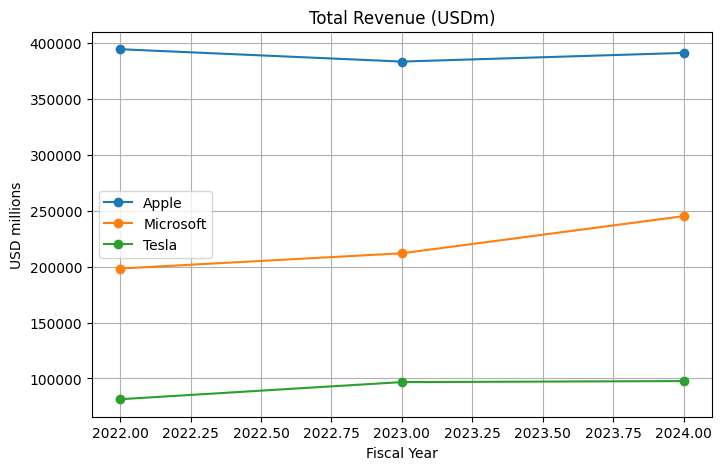

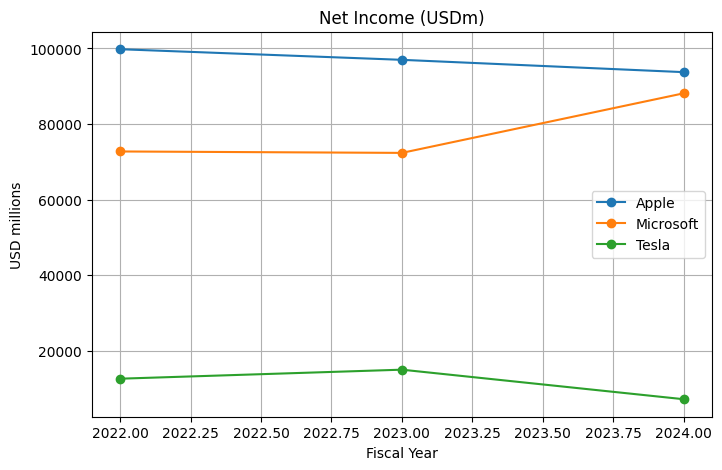

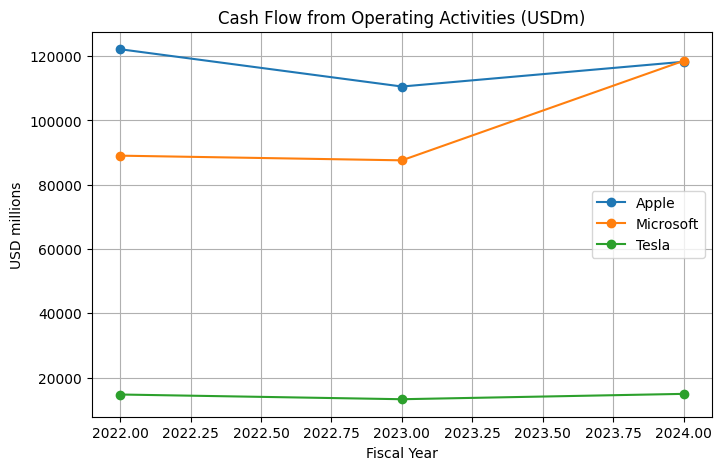

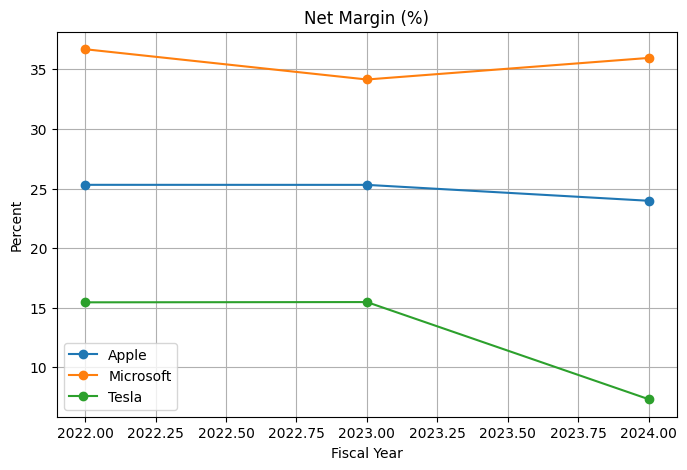

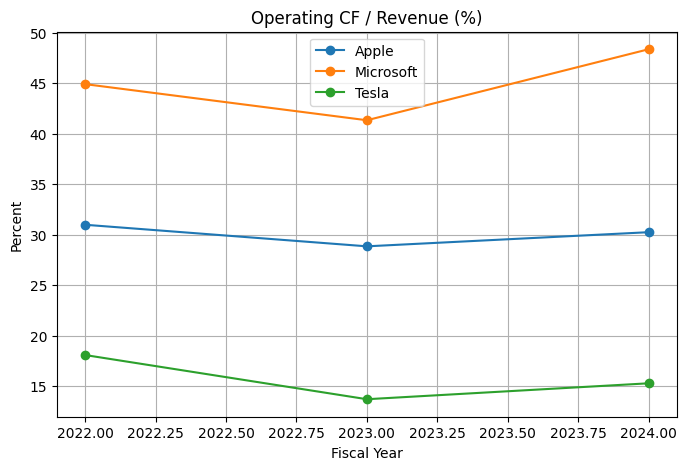

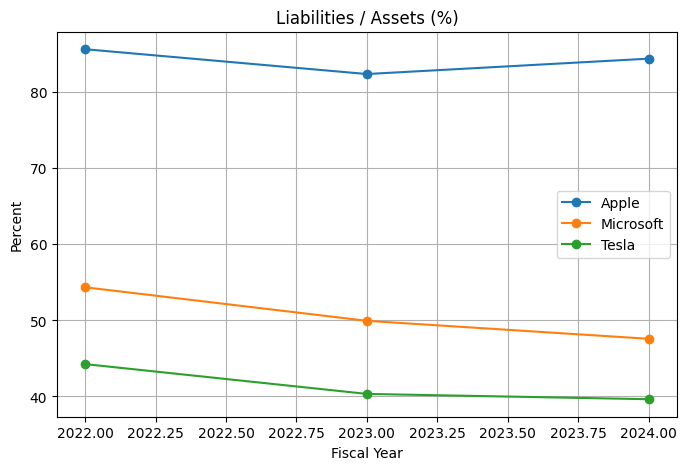

In [22]:
# Visualizations (one chart per figure; matplotlib only)
def plot_metric(metric, ylabel):
    plt.figure(figsize=(8,5))
    for company, sub in df.groupby("Company"):
        s = sub.sort_values("Fiscal Year")
        plt.plot(s["Fiscal Year"], s[metric], marker="o", label=company)
    plt.title(metric)
    plt.xlabel("Fiscal Year")
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_metric("Total Revenue (USDm)", "USD millions")
plot_metric("Net Income (USDm)", "USD millions")
plot_metric("Cash Flow from Operating Activities (USDm)", "USD millions")
plot_metric("Net Margin (%)", "Percent")
plot_metric("Operating CF / Revenue (%)", "Percent")
plot_metric("Liabilities / Assets (%)", "Percent")


## Narrative Insights



- **Apple** - Revenue CAGR: -0.4%, Net Income CAGR: -3.1%, Assets CAGR: 1.7%, OpCF CAGR: -1.6%.
- **Microsoft** - Revenue CAGR: 11.2%, Net Income CAGR: 10.1%, Assets CAGR: 18.5%, OpCF CAGR: 15.4%.
- **Tesla** - Revenue CAGR: 9.5%, Net Income CAGR: -24.6%, Assets CAGR: 21.8%, OpCF CAGR: 0.7%.
- **Apple** - Best/Worst Revenue YoY: 2.0% / -2.8%; Best/Worst Net Income YoY: -2.8% / -3.4%; Avg OpCF/Revenue: 30.0%; Avg Net Margin: 24.9%; Latest Leverage (Liab/Assets): 84.4%.
- **Microsoft** - Best/Worst Revenue YoY: 15.7% / 6.9%; Best/Worst Net Income YoY: 21.8% / -0.5%; Avg OpCF/Revenue: 44.9%; Avg Net Margin: 35.6%; Latest Leverage (Liab/Assets): 47.6%.
- **Tesla** - Best/Worst Revenue YoY: 18.8% / 0.9%; Best/Worst Net Income YoY: 19.0% / -52.2%; Avg OpCF/Revenue: 15.7%; Avg Net Margin: 12.8%; Latest Leverage (Liab/Assets): 39.6%.


## Insights (2022–2024)

### **Microsoft**
- Strong **revenue and net income CAGR (~10–11%)**, driven by cloud and AI expansion.  
- **High margins (~35%)** and rising **cash flow efficiency (~45% of revenue)** show durable profitability.  
- **Low leverage (~48%)** supports flexibility and steady shareholder returns.  
- **Bottom line:** Consistent growth and best-in-class cash generation.

---

### **Tesla**
- **Revenue growth (~9%)** remains solid but **net income (-25%)** shows margin pressure.  
- **Flat cash flow** and rising assets suggest efficiency challenges.  
- **Moderate leverage (~40%)** keeps balance sheet stable.  
- **Bottom line:** Growth normalizing; focus shifts to profitability recovery.

---

### **Apple**
- **Flat revenue** and mild **net income dip (~-3%)** reflect market maturity.  
- **Excellent cash conversion (~30%)** and **strong margins (~25%)** sustain resilience.  
- **High leverage (~84%)** tied to capital-return strategy, not financial stress.  
- **Bottom line:** Stable, cash-rich, and shareholder-focused.

---

### **Overall Comparison**
| Metric | Microsoft | Tesla | Apple |
|---|---|---|---|
| **Revenue CAGR** | +11% | +9% | -0.4% |
| **Net Income CAGR** | +10% | -25% | -3% |
| **OpCF / Revenue** | ~45% | ~16% | ~30% |
| **Net Margin** | 35% | 13% | 25% |

- **Leaders:** Microsoft & Apple in profitability and cash flow.  
- **Volatile:** Tesla - strong top line, weaker earnings quality.  
- **Takeaway:** MSFT = durable growth, AAPL = stable cash engine, TSLA = cyclical innovator.



### **Summary Takeaway**
Microsoft and Apple exemplify **financial maturity and operational efficiency** (durable margins, superior cash conversion).  
Tesla remains a **higher-variance growth story**, with upside tied to cost leadership and software monetization.  
Together, they showcase the spectrum from software scalability (MSFT) to ecosystem monetization (AAPL) to innovation-led manufacturing (TSLA).


In [24]:
df.to_csv("FinAnalysis.csv", index=False)  